<a href="https://colab.research.google.com/github/dhth/tour-pics-classifier/blob/master/experiments/exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment #2:
Classify images into three categories:

    - `people-close-up`
    - `people-landscape`
    - `landscape`
    
   
### people-close-up
An image where people cover most (>90%) of the image, which makes figuring out the location of the shot difficult

### people-landscape
An image with people in the foreground and a landscape in the background

### landscape
An image which is not focused on a human subject.

## Why?
One might want to prioritise images where the location of the shot is clearly (or tacitly visible) over those which provide no context about it.

## Next steps:
- Multi-label classification

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
classes = ['landscape', 'people-close-up', 'people-landscape']

In [0]:
DATA_PATH = 'local_only_data'

In [71]:
for class_name in classes:
    !wc -l {DATA_PATH}/{class_name}.txt

245 local_only_data/landscape.txt
230 local_only_data/people-close-up.txt
266 local_only_data/people-landscape.txt


In [0]:
MAX_PICS = 300

In [0]:
for class_name in classes:
    
    print(class_name)
    
    folder = class_name
    file = f'{class_name}.txt'
    
    path = Path(DATA_PATH)
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    
    download_images(path/file, dest, max_pics=MAX_PICS)

In [0]:
BATCH_SIZE = 128

In [0]:
path = Path(DATA_PATH)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(do_flip=True, max_rotate=0.2, max_warp=0.2), size=224, num_workers=8, bs=BATCH_SIZE).normalize(imagenet_stats)

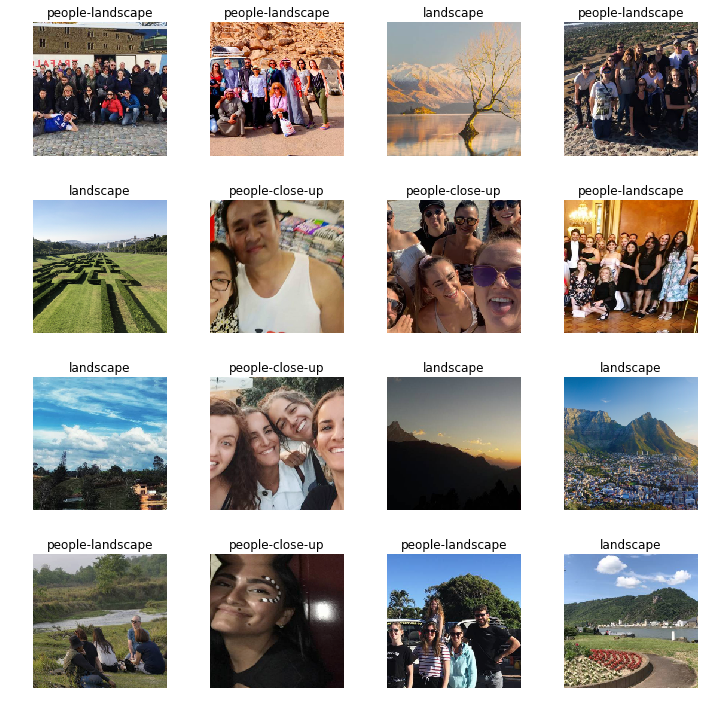

In [77]:
data.show_batch(rows=4, figsize=(10,10))

In [78]:
print(data.classes)
print(f'Training size: {len(data.train_ds)}')
print(f'Validation size: {len(data.valid_ds)}')
print(f'Total: {len(data.train_ds) + len(data.valid_ds)}')

['landscape', 'people-close-up', 'people-landscape']
Training size: 596
Validation size: 148
Total: 744


## Training: ResNet-34

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
# learn.recorder.plot()

In [0]:
lr = 1e-3

In [80]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.052950,0.680510,0.270270,04:00
1,0.616804,0.339556,0.135135,03:58


In [0]:
learn.save('exp-2-3-classes-740-im-stage-1-2-epochs')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

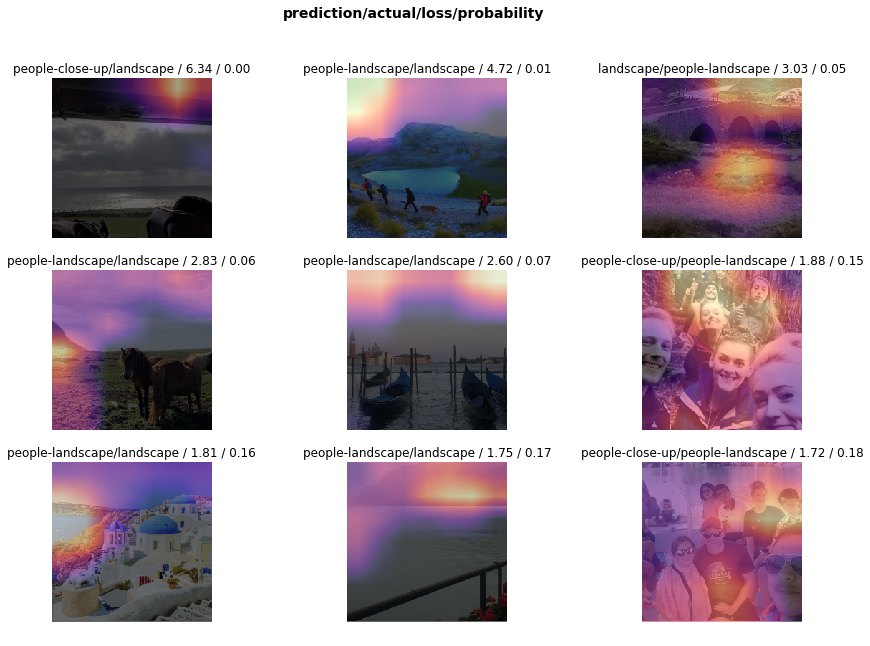

In [83]:
interp.plot_top_losses(9, figsize=(15,10), heatmap=True)

In [0]:
learn.unfreeze()

In [87]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.179231,0.213327,0.081081,05:21
1,0.203874,0.176523,0.047297,05:25


In [0]:
learn.save('exp-2-3-classes-740-im-stage-2-2-epochs')

In [89]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.156971,0.160193,0.040541,05:25


In [0]:
learn.save('exp-2-3-classes-740-im-stage-2-3-epochs')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
DRIVE_BASE_PATH = "/content/gdrive/My\ Drive/Colab\ Notebooks/"

In [0]:
# !mkdir {DRIVE_BASE_PATH}/saved_models/TR/

In [0]:
!cp local_only_data/models/exp-2-3-classes-740-im-stage-2-3-epochs.pth {DRIVE_BASE_PATH}/saved_models/TR/

## Testing on new data

In [0]:
test_data ={
    "landscape": [
        "https://cdn.tourradar.com/s3/content-pages/89/1200x630/aLxKP8.jpg",
        "https://cdn.tourradar.com/s3/review/750x400/130750_b1fa7c36.jpg",
        "https://cdn.tourradar.com/s3/review/750x400/105003_1c235882.jpg"
        ],
                    
    "people-landscape": [
        "https://cdn.tourradar.com/s3/review/750x400/136416_f4803a33.jpg",
        "https://cdn.tourradar.com/s3/review/750x400/114273_9ab28070.jpg",
        "https://cdn.tourradar.com/s3/review/750x400/127867_dbaa633e.jpg"
        ],
    "people-close-up": [
        "https://cdn.tourradar.com/s3/review/750x400/94503_18341db0.jpg",
        "https://cdn.tourradar.com/s3/review/750x400/97696_90e6a228.jpg",
        "https://cdn.tourradar.com/s3/review/750x400/115007_a769a0fe.jpg"
    ]
}

In [0]:
def fetch_test_pics(image_dict, local_dir_name, data_classes):
    !mkdir -p {local_dir_name}

    for class_name in data_classes:
        for i, el in enumerate(image_dict[class_name]):
            print(f'wget -q "{el}" -O {local_dir_name}/{class_name}_{i}.jpg')
            !wget -q "{el}" -O {local_dir_name}/{class_name}_{i}.jpg

    return Path(local_dir_name)

In [113]:
test_path = fetch_test_pics(test_data, 'local_only_test_data', data.classes)

wget -q "https://cdn.tourradar.com/s3/content-pages/89/1200x630/aLxKP8.jpg" -O local_only_test_data/landscape_0.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/130750_b1fa7c36.jpg" -O local_only_test_data/landscape_1.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/105003_1c235882.jpg" -O local_only_test_data/landscape_2.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/94503_18341db0.jpg" -O local_only_test_data/people-close-up_0.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/97696_90e6a228.jpg" -O local_only_test_data/people-close-up_1.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/115007_a769a0fe.jpg" -O local_only_test_data/people-close-up_2.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/136416_f4803a33.jpg" -O local_only_test_data/people-landscape_0.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/114273_9ab28070.jpg" -O local_only_test_data/people-landscape_1.jpg
wget -q "https://cdn.tourradar.com/s3/review/750x400/127

In [0]:
from math import ceil

In [0]:
def see_test_results(test_dir_path):
    test_files = test_dir_path.ls()
    
    num_cols = 3
    num_rows = ceil(len(test_files)/num_cols)
    fig,ax = plt.subplots(num_rows,num_cols)
    fig.set_size_inches(num_cols*3,num_rows*3)

    for ind, ax in enumerate(ax.flat):
        if ind>=len(test_files):
            break   
            
        x = open_image(test_files[ind])
        pred_class,pred_idx,outputs = learn.predict(x)
        xb,_ = data.one_item(x)
        xb_im = Image(data.denorm(xb)[0])
        xb_im.show(ax)
        
#         title = test_files[ind].stem.split('_')[0]
        ax.set_title(f'Predicted: {pred_class.obj}')
    
    fig.suptitle('Results', fontsize=20)

    plt.show()

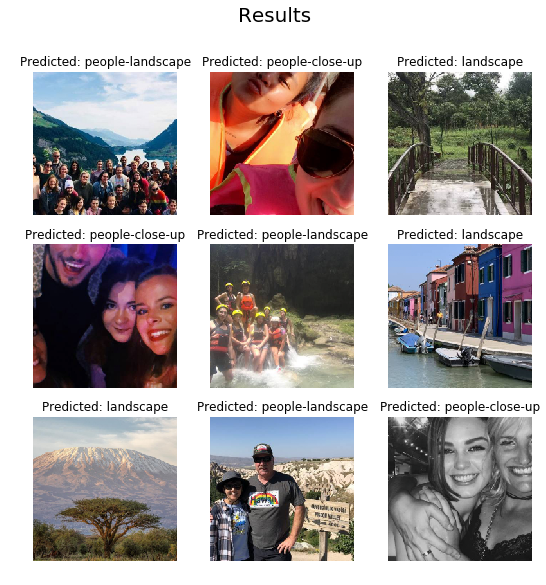

In [114]:
see_test_results(test_path)